In [1]:
import sys
import os

# Add the project directory to sys.path
project_path = "/Users/hugocontrerasp/Documents/MORIA_AI_LABS/moria_data_readiness_engine"
if project_path not in sys.path:
    sys.path.append(project_path)

In [2]:
# Import the function
from moria_engine.analysis.data_transformers import build_common_fields_matrix_kpis, build_common_fields_matrix_schema
from moria_engine.analysis import graph_visualizer,graph_explainer
from moria_engine.data import loaders
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyvis.network import Network
import networkx as nx

df_kpis = loaders.load_json_kpis('../data/test/c002_prancing_pony/20250525-hacp-c002_prancing_pony-kpi_details.json')
df_schema = loaders.load_json_schema('../data/test/c002_prancing_pony/20250525-hacp-c002_prancing_pony-data_domains_schema.json')

In [3]:
df_kpis.head()

,kpi_name,domain_name,table_name,field_name
0,Total Revenue,Order,Orders,total_amount
1,Gross Profit Margin,Order,Orders,total_amount
2,Gross Profit Margin,Order,OrderItems,quantity
3,Gross Profit Margin,Order,OrderItems,menu_item_id
4,Gross Profit Margin,Menu,MenuItems,menu_item_id


In [4]:
df_schema.head()

,domain_name,table_name,field_name
0,Customer,Customers,customer_id
1,Customer,Customers,first_name
2,Customer,Customers,last_name
3,Customer,Customers,email
4,Customer,Customers,phone_number


In [5]:
M, table_list, d_table_domain, G = build_common_fields_matrix_kpis(df_kpis)

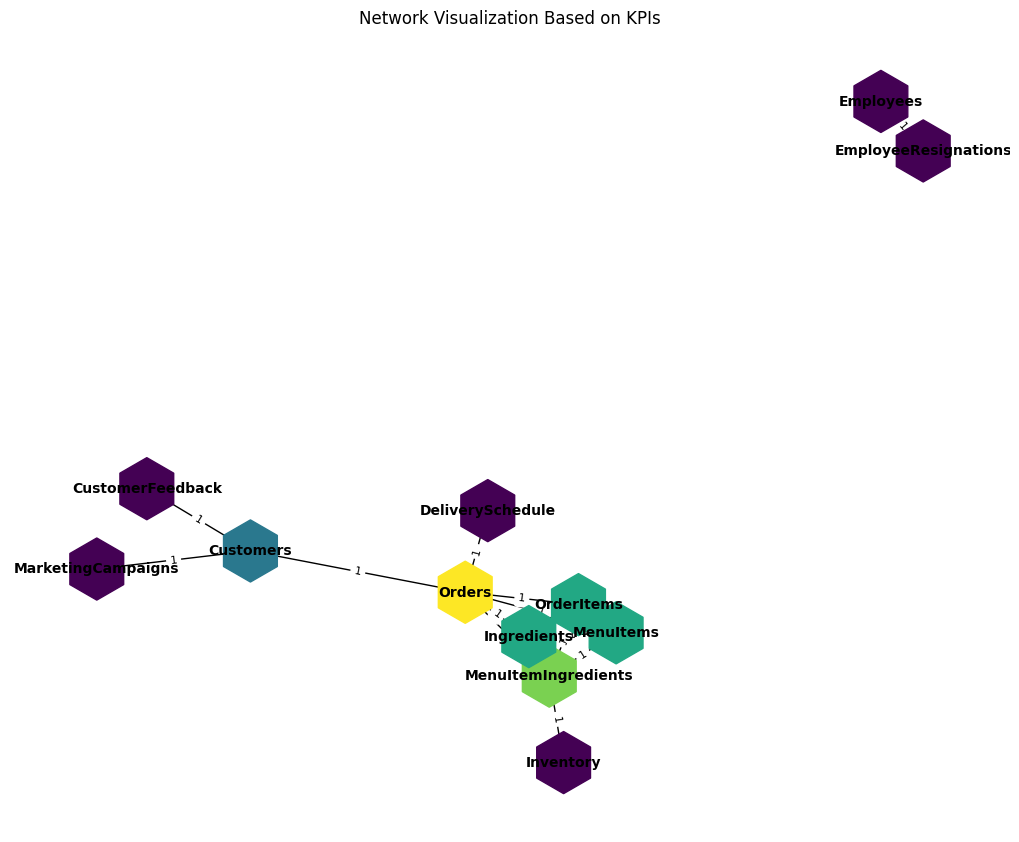

In [6]:
graph_visualizer.visualize_network_kpis(df_kpis)

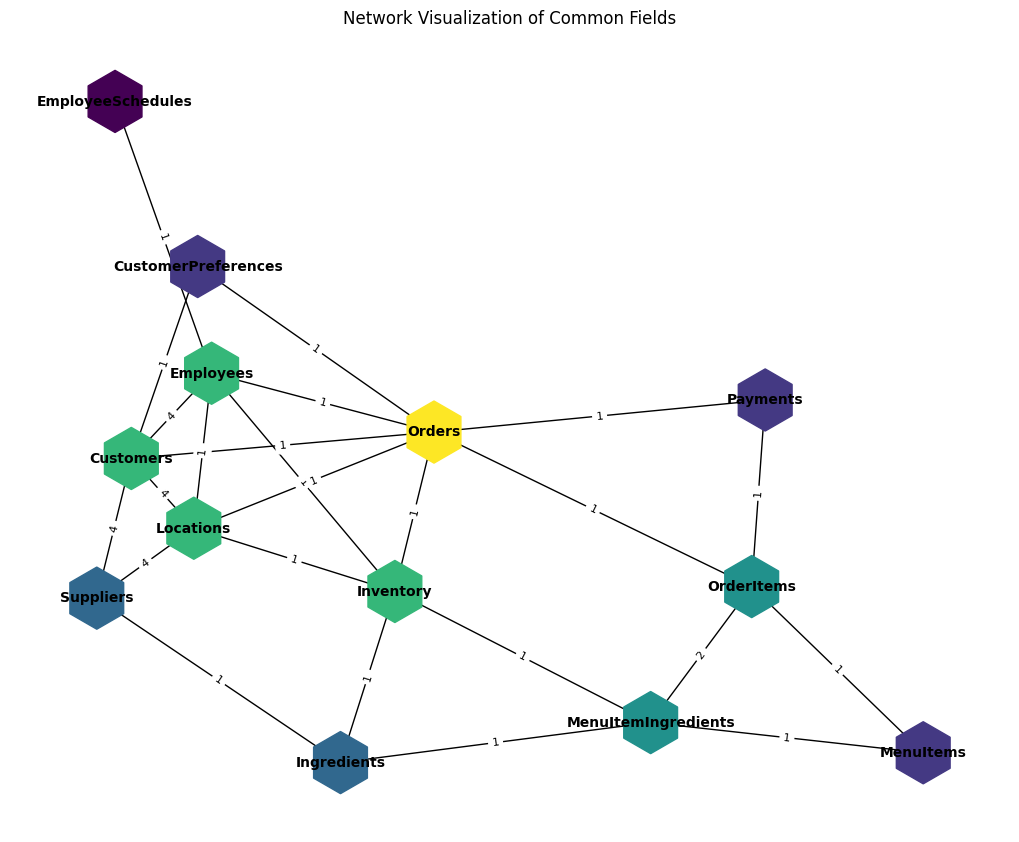

In [7]:
graph_visualizer.visualize_network_schema(df_schema)

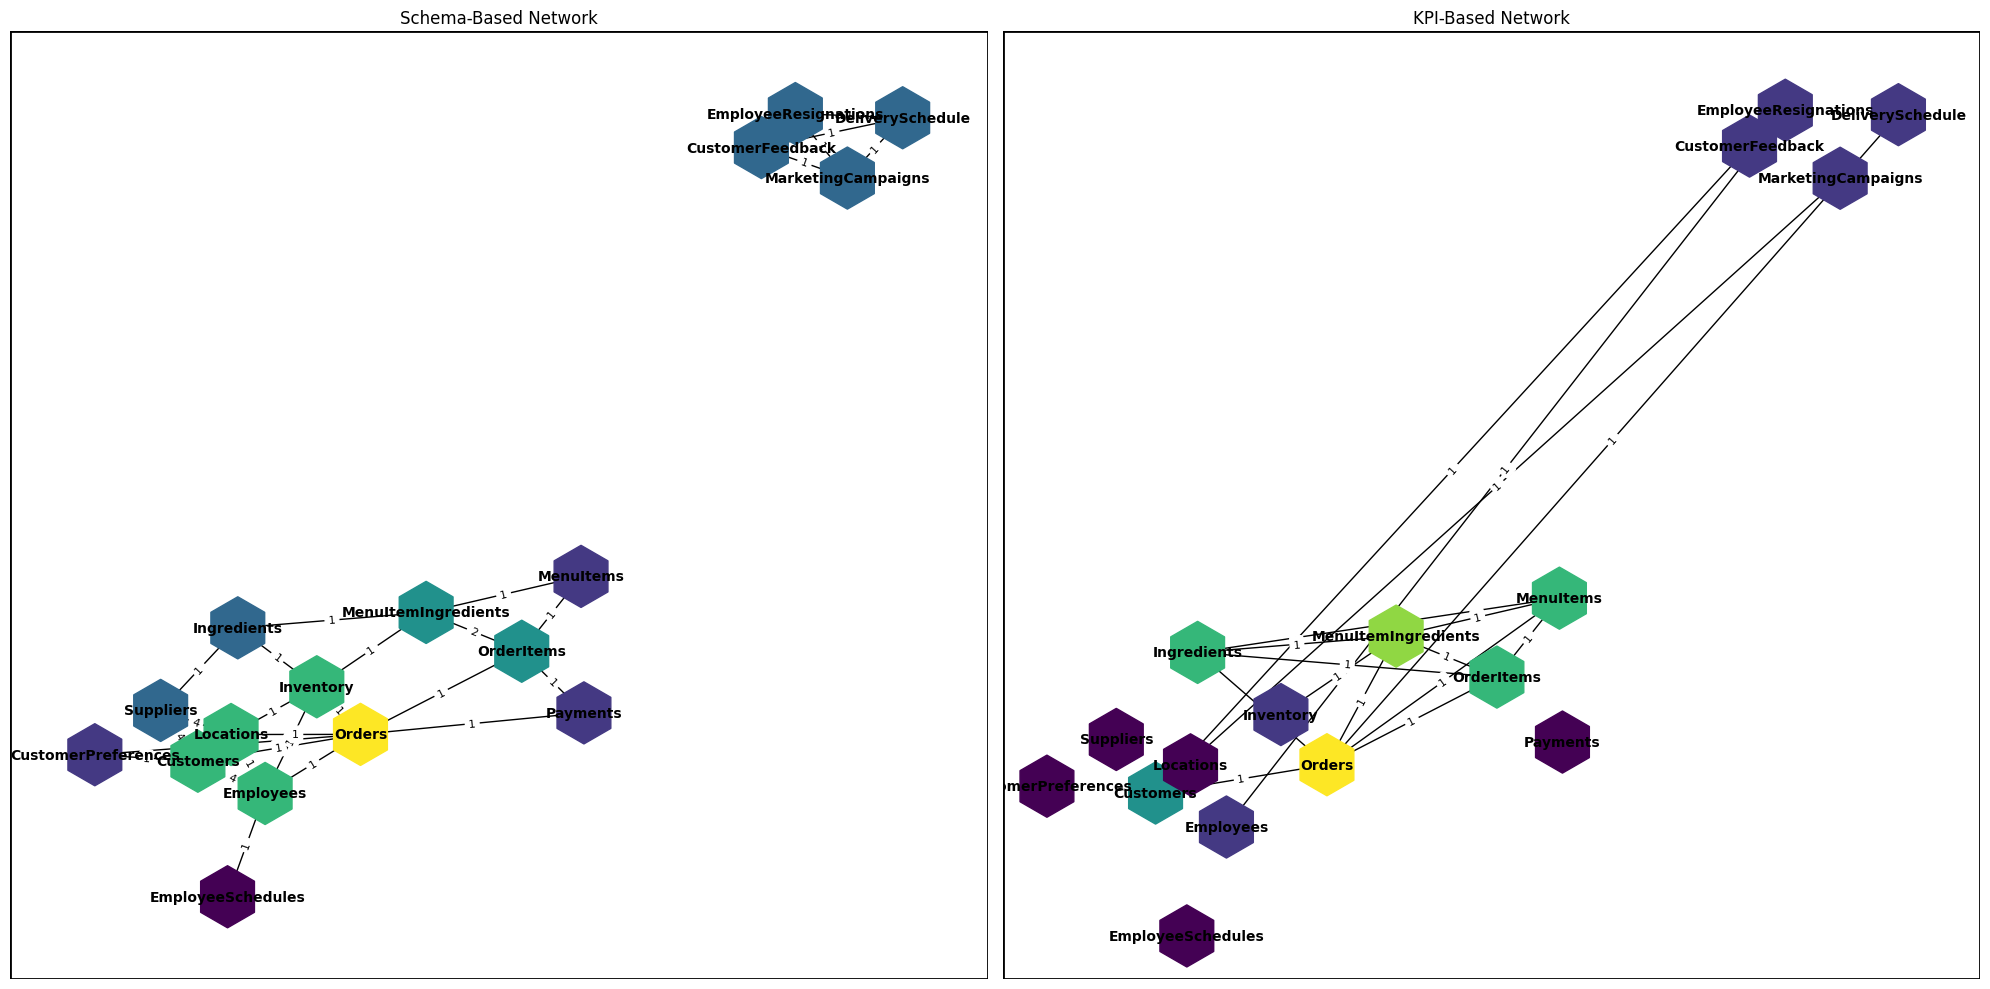

In [8]:
graph_visualizer.visualize_combined_networks1(df_schema, df_kpis)

## Interpretation of the plots
Very interesting to see the edges from the isloated set of nodes present in the kpi network but not in the schema network. This behavoir can be explained by KPIs a) being aspirational or b) unregulated, shadow-DE work happening to report. 

In [9]:
graph_explainer.graph_centrality_attributes(df_kpis)

,node,domain_name,degree,centrality,betweenness_centrality
0,CustomerFeedback,CustomerService,0,0.000000,0.000000
1,Customers,Customer,1,0.090909,0.000000
2,DeliverySchedule,Logistics,0,0.000000,0.000000
3,EmployeeResignations,Employee,0,0.000000,0.000000
4,Employees,Employee,0,0.000000,0.000000
5,Ingredients,Menu,2,0.181818,0.000000
6,Inventory,Inventory,2,0.181818,0.000000
7,MarketingCampaigns,Marketing,0,0.000000,0.000000
8,MenuItemIngredients,Menu,4,0.363636,0.072727
9,MenuItems,Menu,2,0.181818,0.000000


In [10]:
graph_explainer.graph_centrality_attributes(df_schema)

,node,domain_name,degree,centrality,betweenness_centrality
0,CustomerPreferences,Customer,2,0.166667,0.000000
1,Customers,Customer,5,0.416667,0.080808
2,EmployeeSchedules,Employee,1,0.083333,0.000000
3,Employees,Employee,5,0.416667,0.174747
4,Ingredients,Menu,3,0.250000,0.045960
5,Inventory,Inventory,5,0.416667,0.160606
6,Locations,Location,5,0.416667,0.051010
7,MenuItemIngredients,Menu,4,0.333333,0.103535
8,MenuItems,Menu,2,0.166667,0.000000
9,OrderItems,Order,4,0.333333,0.124242


In [11]:
df_schema['table_name'].unique()

array(['Customers', 'CustomerPreferences', 'Orders', 'OrderItems',
       'Payments', 'MenuItems', 'MenuItemIngredients', 'Ingredients',
       'Inventory', 'Employees', 'EmployeeSchedules', 'Suppliers',
       'Locations'], dtype=object)

In [12]:
df_kpis['table_name'].unique()

array(['Orders', 'OrderItems', 'MenuItems', 'Customers',
       'MarketingCampaigns', 'CustomerFeedback', 'Employees',
       'EmployeeResignations', 'MenuItemIngredients', 'Ingredients',
       'Inventory', 'DeliverySchedule'], dtype=object)